In [3]:
import pandas as pd

In [4]:
tickers = ['BTCUSDT', 'ETHUSDT', 'XRPUSDT', 'ADAUSDT', 'DOGEUSDT','EOSUSDT','XLMUSDT','MATICUSDT','SOLUSDT','NEOUSDT','LINKUSDT','NEOUSDT','LTCUSDT','TRXUSDT','ATOMUSDT','UNIUSDT','NEOUSDT','VETUSDT','DOTUSDT','NEARUSDT']


In [5]:
df = pd.read_csv('data/1Hdata.csv')

In [6]:
df = df.set_index('timestamp')

In [7]:
df.head()

,BTCUSDT,ETHUSDT,XRPUSDT,ADAUSDT,DOGEUSDT,EOSUSDT,XLMUSDT,MATICUSDT,SOLUSDT,NEOUSDT,LINKUSDT,NEOUSDT.1,LTCUSDT,TRXUSDT,ATOMUSDT,UNIUSDT,NEOUSDT.2,VETUSDT,DOTUSDT,NEARUSDT
timestamp,,,,,,,,,,,,,,,,,,,,
2022-04-01,46283.49,3455.21,0.8277,1.165,0.1413,2.838,0.2325,1.695,134.52,28.03,17.34,28.03,124.8,0.07494,29.41,11.58,28.03,0.08108,22.07,14.740
2022-04-02,45811.00,3443.77,0.8240,1.155,0.1387,2.786,0.2331,1.653,132.49,27.53,17.40,27.53,124.8,0.07322,31.30,11.65,27.53,0.07716,22.61,14.825
2022-04-03,46407.35,3521.91,0.8432,1.186,0.1466,2.840,0.2370,1.688,136.90,28.00,18.08,28.00,128.7,0.07312,31.97,11.87,28.00,0.08262,23.21,16.813
2022-04-04,46580.51,3519.50,0.8260,1.212,0.1485,2.890,0.2319,1.648,132.14,27.18,17.50,27.18,124.8,0.07070,30.85,11.54,27.18,0.07890,22.89,17.115
2022-04-05,45497.55,3406.99,0.8164,1.171,0.1727,2.753,0.2248,1.592,126.87,25.76,16.74,25.76,122.7,0.06928,29.29,11.12,25.76,0.07584,21.78,16.140


In [33]:
df.head()

,BTCUSDT,ETHUSDT,XRPUSDT,ADAUSDT,DOGEUSDT,EOSUSDT,XLMUSDT,MATICUSDT,SOLUSDT,NEOUSDT,LINKUSDT,LTCUSDT,TRXUSDT,ATOMUSDT,UNIUSDT,VETUSDT,DOTUSDT,NEARUSDT
timestamp,,,,,,,,,,,,,,,,,,
2022-04-01,46283.49,3455.21,0.8277,1.165,0.1413,2.838,0.2325,1.695,134.52,28.03,17.34,124.8,0.07494,29.41,11.58,0.08108,22.07,14.740
2022-04-02,45811.00,3443.77,0.8240,1.155,0.1387,2.786,0.2331,1.653,132.49,27.53,17.40,124.8,0.07322,31.30,11.65,0.07716,22.61,14.825
2022-04-03,46407.35,3521.91,0.8432,1.186,0.1466,2.840,0.2370,1.688,136.90,28.00,18.08,128.7,0.07312,31.97,11.87,0.08262,23.21,16.813
2022-04-04,46580.51,3519.50,0.8260,1.212,0.1485,2.890,0.2319,1.648,132.14,27.18,17.50,124.8,0.07070,30.85,11.54,0.07890,22.89,17.115
2022-04-05,45497.55,3406.99,0.8164,1.171,0.1727,2.753,0.2248,1.592,126.87,25.76,16.74,122.7,0.06928,29.29,11.12,0.07584,21.78,16.140


In [34]:
df.columns

Index(['BTCUSDT', 'ETHUSDT', 'XRPUSDT', 'ADAUSDT', 'DOGEUSDT', 'EOSUSDT',
       'XLMUSDT', 'MATICUSDT', 'SOLUSDT', 'NEOUSDT', 'LINKUSDT', 'LTCUSDT',
       'TRXUSDT', 'ATOMUSDT', 'UNIUSDT', 'VETUSDT', 'DOTUSDT', 'NEARUSDT'],
      dtype='object')

In [36]:
#import pickle
import matplotlib.pyplot as plt
import seaborn
from statsmodels.tsa.stattools import coint
import datetime

In [37]:
# let's define a function to loop through the tickers and do a cointegration test for each combination
def cointegration_test(data, p_value=0.05):
    n = data.shape[1]
    # create matrix to be filled later
    stats = np.zeros((n, n))
    pvalues = np.ones((n, n))
    keys = data.keys() # get the info axis, returns columns if object is a dataframe
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            result = coint(data[keys[i]], data[keys[j]])
            test_stat = result[0]
            pvalue = result[1]
            stats[i, j] = test_stat
            pvalues[i, j] = pvalue
            
            if pvalue < p_value: # pick only statistically significant ones
                pairs.append((keys[i], keys[j]))
                
    return stats, pvalues, pairs

[('BTCUSDT', 'NEOUSDT'), ('BTCUSDT', 'TRXUSDT'), ('ETHUSDT', 'TRXUSDT'), ('XRPUSDT', 'TRXUSDT'), ('ADAUSDT', 'SOLUSDT'), ('ADAUSDT', 'TRXUSDT'), ('DOGEUSDT', 'VETUSDT'), ('EOSUSDT', 'TRXUSDT'), ('XLMUSDT', 'TRXUSDT'), ('XLMUSDT', 'NEARUSDT'), ('SOLUSDT', 'TRXUSDT'), ('SOLUSDT', 'NEARUSDT'), ('NEOUSDT', 'LTCUSDT'), ('NEOUSDT', 'TRXUSDT'), ('LINKUSDT', 'TRXUSDT'), ('LINKUSDT', 'NEARUSDT'), ('UNIUSDT', 'NEARUSDT'), ('VETUSDT', 'DOTUSDT')]


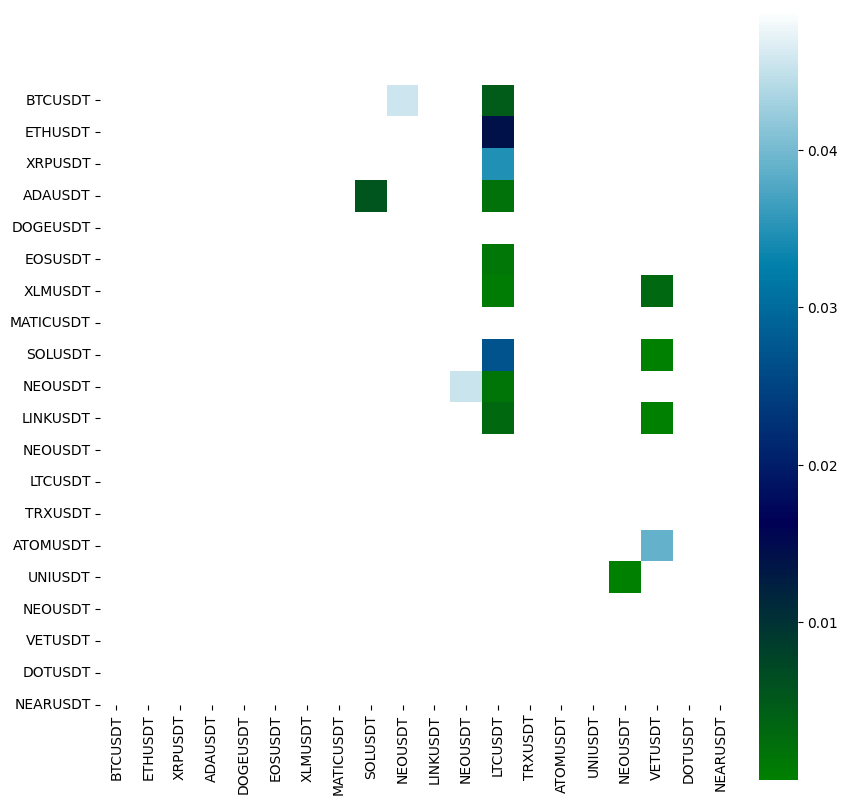

In [38]:
import numpy as np
import seaborn
import pickle
tickers = ['BTCUSDT', 'ETHUSDT', 'XRPUSDT', 'ADAUSDT', 'DOGEUSDT','EOSUSDT','XLMUSDT','MATICUSDT','SOLUSDT','NEOUSDT','LINKUSDT','NEOUSDT','LTCUSDT','TRXUSDT','ATOMUSDT','UNIUSDT','NEOUSDT','VETUSDT','DOTUSDT','NEARUSDT']

p_value = 0.05  # A p-value less than 0.05 is typically considered to be statistically significant

scores, pvalues, pairs = cointegration_test(df,p_value)

fig, ax = plt.subplots(figsize=(10, 10))
seaborn.heatmap(
    pvalues,
    xticklabels= tickers,
    yticklabels= tickers,
    cmap="ocean",
    mask=(pvalues >= 0.05),
    square=True
)
print(pairs)

In [39]:
df.head()

,BTCUSDT,ETHUSDT,XRPUSDT,ADAUSDT,DOGEUSDT,EOSUSDT,XLMUSDT,MATICUSDT,SOLUSDT,NEOUSDT,LINKUSDT,LTCUSDT,TRXUSDT,ATOMUSDT,UNIUSDT,VETUSDT,DOTUSDT,NEARUSDT
timestamp,,,,,,,,,,,,,,,,,,
2022-04-01,46283.49,3455.21,0.8277,1.165,0.1413,2.838,0.2325,1.695,134.52,28.03,17.34,124.8,0.07494,29.41,11.58,0.08108,22.07,14.740
2022-04-02,45811.00,3443.77,0.8240,1.155,0.1387,2.786,0.2331,1.653,132.49,27.53,17.40,124.8,0.07322,31.30,11.65,0.07716,22.61,14.825
2022-04-03,46407.35,3521.91,0.8432,1.186,0.1466,2.840,0.2370,1.688,136.90,28.00,18.08,128.7,0.07312,31.97,11.87,0.08262,23.21,16.813
2022-04-04,46580.51,3519.50,0.8260,1.212,0.1485,2.890,0.2319,1.648,132.14,27.18,17.50,124.8,0.07070,30.85,11.54,0.07890,22.89,17.115
2022-04-05,45497.55,3406.99,0.8164,1.171,0.1727,2.753,0.2248,1.592,126.87,25.76,16.74,122.7,0.06928,29.29,11.12,0.07584,21.78,16.140


In [40]:
df = df.dropna(axis=0, how='all') # check if necessary
df = df.dropna(axis=1) # check if necessary
new_tickers = df.columns.tolist()
print(f"we have {len(new_tickers)} tickers left")
df.to_pickle("close_prices.pkl")
df.info()

we have 18 tickers left
<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 2022-04-01 to 2023-04-01
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BTCUSDT    366 non-null    float64
 1   ETHUSDT    366 non-null    float64
 2   XRPUSDT    366 non-null    float64
 3   ADAUSDT    366 non-null    float64
 4   DOGEUSDT   366 non-null    float64
 5   EOSUSDT    366 non-null    float64
 6   XLMUSDT    366 non-null    float64
 7   MATICUSDT  366 non-null    float64
 8   SOLUSDT    366 non-null    float64
 9   NEOUSDT    366 non-null    float64
 10  LINKUSDT   366 non-null    float64
 11  LTCUSDT    366 non-null    float64
 12  TRXUSDT    366 non-null    float64
 13  ATOMUSDT   366 non-null    float64
 14  UNIUSDT    366 non-null    float64
 15  VETUSDT    366 non-null    float64
 16  DOTUSDT    366 non-null    float64
 17  NEARUSDT   366 non-null    float64
dtypes: float64(18)
memory usage: 54.3+ KB


Filter For More Significant Pairs
Filter more to get more significant pairs, and eliminate empty cells.

In [41]:
# let's define a function to loop through the tickers and do a cointegration test for each combination
def cointegration_test(data, p_value=0.05):
    n = data.shape[1]
    # create matrix to be filled later
    stats = np.zeros((n, n))
    pvalues = np.ones((n, n))
    keys = data.keys() # get the info axis, returns columns if object is a dataframe
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            result = coint(data[keys[i]], data[keys[j]])
            test_stat = result[0]
            pvalue = result[1]
            stats[i, j] = test_stat
            pvalues[i, j] = pvalue
            
            if pvalue < p_value: # pick only statistically significant ones
                pairs.append((keys[i], keys[j]))
                
    return stats, pvalues, pairs

[('BTCUSDT', 'NEOUSDT'), ('BTCUSDT', 'TRXUSDT'), ('ETHUSDT', 'TRXUSDT'), ('XRPUSDT', 'TRXUSDT'), ('ADAUSDT', 'SOLUSDT'), ('ADAUSDT', 'TRXUSDT'), ('DOGEUSDT', 'VETUSDT'), ('EOSUSDT', 'TRXUSDT'), ('XLMUSDT', 'TRXUSDT'), ('XLMUSDT', 'NEARUSDT'), ('SOLUSDT', 'TRXUSDT'), ('SOLUSDT', 'NEARUSDT'), ('NEOUSDT', 'LTCUSDT'), ('NEOUSDT', 'TRXUSDT'), ('LINKUSDT', 'TRXUSDT'), ('LINKUSDT', 'NEARUSDT'), ('UNIUSDT', 'NEARUSDT'), ('VETUSDT', 'DOTUSDT')]


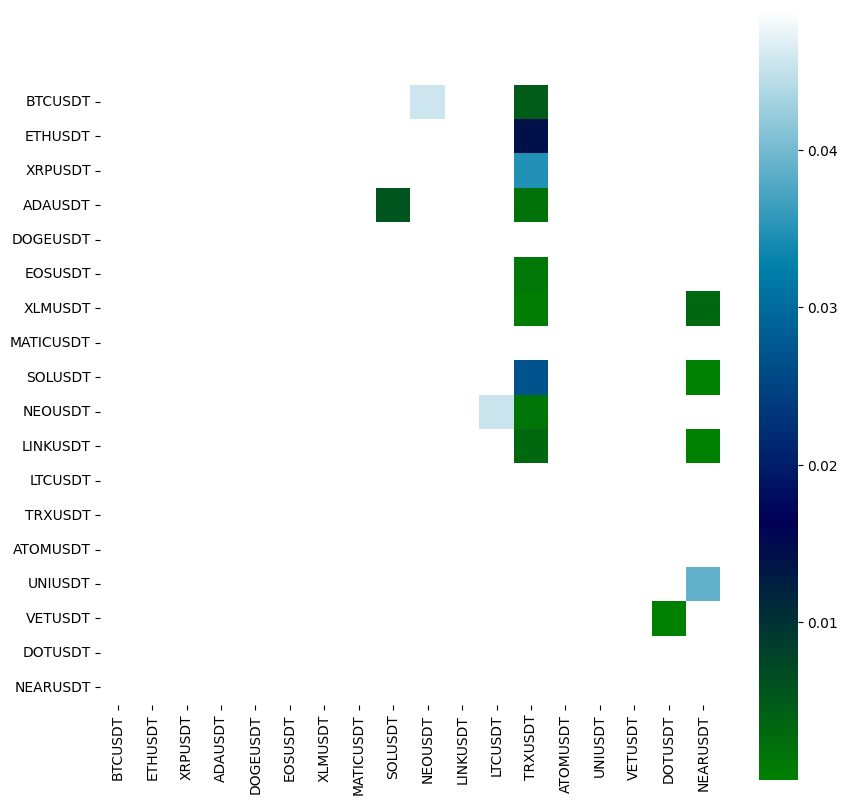

In [42]:
p_value = 0.05  # A p-value less than 0.05 is typically considered to be statistically significant

scores, pvalues, pairs = cointegration_test(df,p_value)

fig, ax = plt.subplots(figsize=(10, 10))
seaborn.heatmap(
    pvalues,
    xticklabels=new_tickers,
    yticklabels=new_tickers,
    cmap="ocean",
    mask=(pvalues >= 0.05),
    square=True
)
print(pairs)

,SOLUSDT,NEOUSDT,LTCUSDT,TRXUSDT,VETUSDT,DOTUSDT,NEARUSDT
BTCUSDT,nan,0.046,nan,0.005,nan,nan,nan
ETHUSDT,nan,nan,nan,0.014,nan,nan,nan
XRPUSDT,nan,nan,nan,0.035,nan,nan,nan
ADAUSDT,0.006,nan,nan,0.002,nan,nan,nan
DOGEUSDT,nan,nan,nan,nan,0.049,nan,nan
EOSUSDT,nan,nan,nan,0.001,nan,nan,nan
XLMUSDT,nan,nan,nan,0.001,nan,nan,0.003
SOLUSDT,nan,nan,nan,0.027,nan,nan,0.000
NEOUSDT,nan,nan,0.045,0.001,nan,nan,nan
LINKUSDT,nan,nan,nan,0.003,nan,nan,0.000


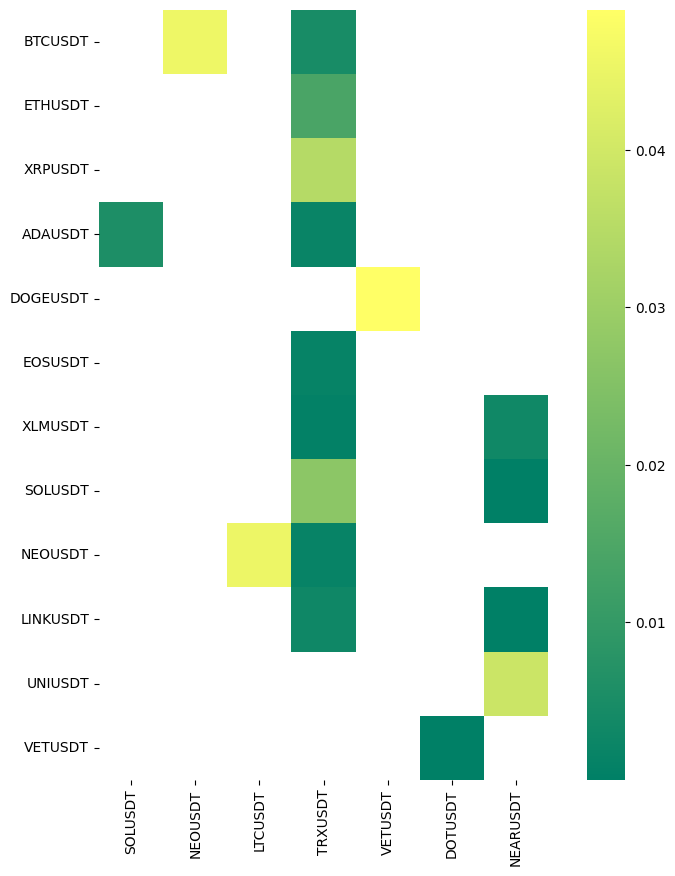

In [43]:
mask_matrix = (pvalues >= 0.05) # possible to increase the level of significance

mask_df = pd.DataFrame(mask_matrix, index= new_tickers, columns = new_tickers)
scores_df = pd.DataFrame(scores, index= new_tickers, columns = new_tickers)
pvalues_df = pd.DataFrame(pvalues, index= new_tickers, columns = new_tickers)

df_f = pvalues_df[~mask_df].dropna(how='all', axis=1)
df_f = df_f.dropna(how='all')

def gold_apply(x):
    color = {True: "background-color: #c78f2e", False: "color : white"}
    is_color = (x > 0).replace(color)
    return is_color

# Another way to format table is applymap
# def color_map(x):
#     return f"color: {'red' if x > 0 else 'white'}"

# df_f.style.applymap(color_map)

fig, ax = plt.subplots(figsize=(10, 10))
seaborn.heatmap(
    df_f,
    xticklabels=df_f.columns,
    yticklabels=df_f.index,
    cmap="summer",
    square=True
)
df_f.style.format(precision=3)\
.apply(gold_apply)

In [44]:
x_list = df_f.index.tolist()
y_list = df_f.columns.tolist()

new_pairs_list = [] # list of pairs as tuples (A,B)

for i in range(len(x_list)):
    for j in range(len(y_list)):
        if df_f.iloc[i,j]>0:
            new_pairs_list.append((x_list[i], y_list[j]))

new_pairs_list

[('BTCUSDT', 'NEOUSDT'),
 ('BTCUSDT', 'TRXUSDT'),
 ('ETHUSDT', 'TRXUSDT'),
 ('XRPUSDT', 'TRXUSDT'),
 ('ADAUSDT', 'SOLUSDT'),
 ('ADAUSDT', 'TRXUSDT'),
 ('DOGEUSDT', 'VETUSDT'),
 ('EOSUSDT', 'TRXUSDT'),
 ('XLMUSDT', 'TRXUSDT'),
 ('XLMUSDT', 'NEARUSDT'),
 ('SOLUSDT', 'TRXUSDT'),
 ('SOLUSDT', 'NEARUSDT'),
 ('NEOUSDT', 'LTCUSDT'),
 ('NEOUSDT', 'TRXUSDT'),
 ('LINKUSDT', 'TRXUSDT'),
 ('LINKUSDT', 'NEARUSDT'),
 ('UNIUSDT', 'NEARUSDT'),
 ('VETUSDT', 'DOTUSDT')]

In [45]:
new_pairs_str =[] # list of pairs as string A-B

for column in df_f:
    toprint = df_f.index[df_f[column]>0].tolist()
    new_pairs_str.append([column + "-" + s for s in toprint])
    
new_pairs_str

[['SOLUSDT-ADAUSDT'],
 ['NEOUSDT-BTCUSDT'],
 ['LTCUSDT-NEOUSDT'],
 ['TRXUSDT-BTCUSDT',
  'TRXUSDT-ETHUSDT',
  'TRXUSDT-XRPUSDT',
  'TRXUSDT-ADAUSDT',
  'TRXUSDT-EOSUSDT',
  'TRXUSDT-XLMUSDT',
  'TRXUSDT-SOLUSDT',
  'TRXUSDT-NEOUSDT',
  'TRXUSDT-LINKUSDT'],
 ['VETUSDT-DOGEUSDT'],
 ['DOTUSDT-VETUSDT'],
 ['NEARUSDT-XLMUSDT',
  'NEARUSDT-SOLUSDT',
  'NEARUSDT-LINKUSDT',
  'NEARUSDT-UNIUSDT']]

In [46]:
new_pairs_dic= {} # list of pairs as dictionary {'A':['B','C']}

for column in df_f:
    new_pairs_dic[column] = df_f.index[df_f[column]>0].tolist()

new_pairs_dic

{'SOLUSDT': ['ADAUSDT'],
 'NEOUSDT': ['BTCUSDT'],
 'LTCUSDT': ['NEOUSDT'],
 'TRXUSDT': ['BTCUSDT',
  'ETHUSDT',
  'XRPUSDT',
  'ADAUSDT',
  'EOSUSDT',
  'XLMUSDT',
  'SOLUSDT',
  'NEOUSDT',
  'LINKUSDT'],
 'VETUSDT': ['DOGEUSDT'],
 'DOTUSDT': ['VETUSDT'],
 'NEARUSDT': ['XLMUSDT', 'SOLUSDT', 'LINKUSDT', 'UNIUSDT']}

In [47]:
df_f.to_pickle("pairs_to_download.pkl")

In [48]:
df.head()

,BTCUSDT,ETHUSDT,XRPUSDT,ADAUSDT,DOGEUSDT,EOSUSDT,XLMUSDT,MATICUSDT,SOLUSDT,NEOUSDT,LINKUSDT,LTCUSDT,TRXUSDT,ATOMUSDT,UNIUSDT,VETUSDT,DOTUSDT,NEARUSDT
timestamp,,,,,,,,,,,,,,,,,,
2022-04-01,46283.49,3455.21,0.8277,1.165,0.1413,2.838,0.2325,1.695,134.52,28.03,17.34,124.8,0.07494,29.41,11.58,0.08108,22.07,14.740
2022-04-02,45811.00,3443.77,0.8240,1.155,0.1387,2.786,0.2331,1.653,132.49,27.53,17.40,124.8,0.07322,31.30,11.65,0.07716,22.61,14.825
2022-04-03,46407.35,3521.91,0.8432,1.186,0.1466,2.840,0.2370,1.688,136.90,28.00,18.08,128.7,0.07312,31.97,11.87,0.08262,23.21,16.813
2022-04-04,46580.51,3519.50,0.8260,1.212,0.1485,2.890,0.2319,1.648,132.14,27.18,17.50,124.8,0.07070,30.85,11.54,0.07890,22.89,17.115
2022-04-05,45497.55,3406.99,0.8164,1.171,0.1727,2.753,0.2248,1.592,126.87,25.76,16.74,122.7,0.06928,29.29,11.12,0.07584,21.78,16.140
